# TP1 - Analyse de données - Initiation
## Mekhdoul Meriem - Aden Saleh Balkhis

# Setup

In [283]:
import pandas
import numpy

%matplotlib inline
import matplotlib.pyplot as plt
pandas.options.display.max_rows = 10

# 1. Import fichier données

In [286]:
df = pandas.read_excel("Capital.xls")

#renommer les colonnes pour plus de lisibilité
df = df.rename(columns = {"X": "Ville", "Y": "Taxe", "Z": "Région"})
df.head()


,Ville,Taxe,Région
0,Aix en provence,18.94,Sud-Est
1,Ajaccio,22.06,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
4,Annecy,14.97,Sud-Est


# 2. Représentation graphique du pourcentage de ville par région - Histogramme

In [289]:
# calculer le nombre de ville par région
nbVilles_par_Region = df.Région.value_counts()

#calculer le pourcentage : nombre de ville(dans la région) * 100 / nombre de villes total
pourcentage_Ville_par_Region = nbVilles_par_Region * 100 / df.Ville.count()


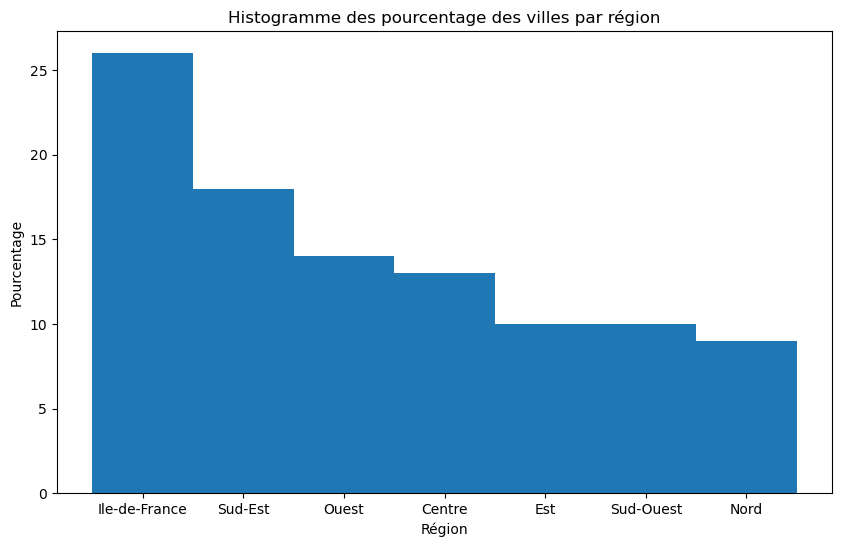

In [293]:
plt.figure(figsize =(10,6))
plt.title("Histogramme des pourcentage des villes par région")
plt.xlabel("Région")
plt.ylabel("Pourcentage")

df2 = pandas.DataFrame({'Région':pourcentage_Ville_par_Region.index, 'Value':pourcentage_Ville_par_Region.values})

plt.bar(df2['Région'],df2['Value'], width=1)
plt.show()

# 3. Autres représentations graphiques

## Pie chart

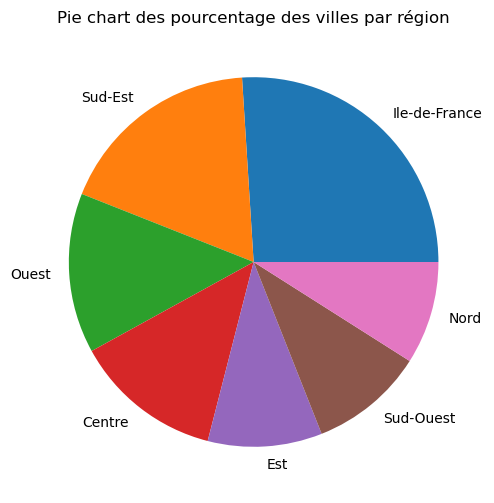

In [300]:
plt.figure(figsize =(10,6))
plt.title("Pie chart des pourcentage des villes par région")

plt.pie(df2.Value, labels = df2.Région)
plt.show()

## Courbe

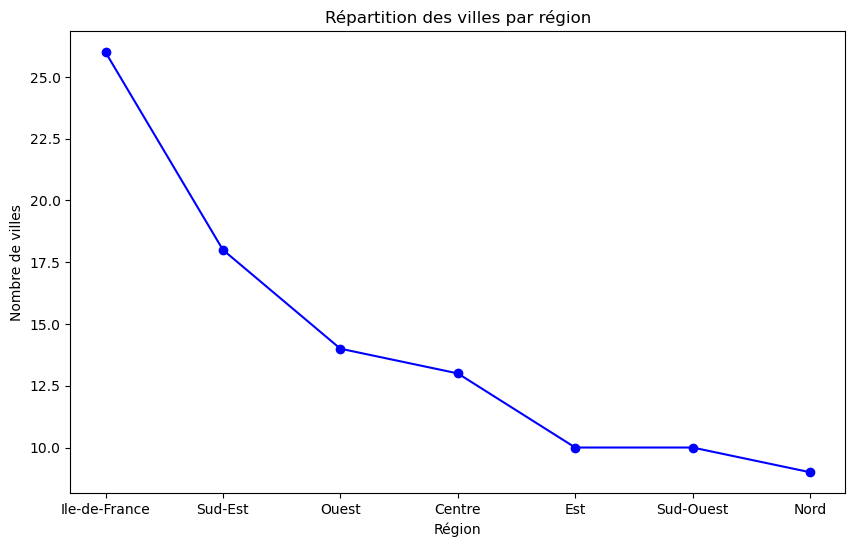

In [309]:
plt.figure(figsize=(10,6))
plt.plot(pourcentage_Ville_par_Region.index, pourcentage_Ville_par_Region.values, marker="o", linestyle="-", color="b")


plt.xlabel("Région")  # Les régions sont sur l'axe Y
plt.ylabel("Nombre de villes")  # Le nombre de villes est sur l'axe X
plt.title("Répartition des villes par région")
 
plt.show()

# 4. La région la plus représentée

In [136]:
maxRegion = df2.Région[df2.Value == df2.Value.max()].iloc[0]
print("La région la plus représentée dans ce dataset est :", maxRegion)

maxRegion = df2.Région[df2.Value == df2.Value.min()].iloc[0]
print("La région la moins représentée dans ce dataset est :", maxRegion)

La région la plus représentée dans ce dataset est : Ile-de-France
La région la moins représentée dans ce dataset est : Nord


# 5. Statistiques sur le taux de la taxe d’habitation

In [320]:
print("Statistiques générales sur le taux de la taxe d'habitation pour l'ensemble des villes")
print(df.Taxe.describe())

#regrouper les stats selon la région :
g = df.groupby('Région')

stats = pandas.DataFrame({
    "Nombre de villes": g['Ville'].count(),
    "Taxe moyenne": g['Taxe'].mean(),
    "Écart-type taxe ": g['Taxe'].std(),
    "Taxe Min": g['Taxe'].min(),
    "Taxe Max": g['Taxe'].max()
})

stats = stats.reset_index()

Statistiques générales sur le taux de la taxe d'habitation pour l'ensemble des villes
count    100.000000
mean      17.770700
std        5.529599
min        3.680000
25%       15.062500
50%       17.625000
75%       20.522500
max       36.170000
Name: Taxe, dtype: float64


## Regroupement des stats par région

In [328]:
stats.head()

,Région,Nombre de villes,Taxe moyenne,Écart-type taxe,Taxe Min,Taxe Max
0,Centre,13,18.115385,1.906881,15.77,21.55
1,Est,10,17.662000,2.095200,14.98,22.04
2,Ile-de-France,26,11.764615,3.879327,3.68,19.32
3,Nord,9,25.951111,7.099798,15.37,36.17
4,Ouest,14,18.896429,3.098314,14.00,25.99


# 6. La région la plus intéressante pour le taux de la taxe d’habitation

In [334]:
taux_region = df.groupby("Région")["Taxe"].mean()
tauxmin=taux_region.min()
regionmin=taux_region.idxmin()

# Afficher le résultat
print(f"la plus interessante est: {regionmin} avec {tauxmin}" )


la plus interessante est: Ile-de-France avec 11.764615384615384


# 7. La région la plus représentative de la moyenne nationale (du taux de la taxe d'habitation)

In [348]:
national_mean = df.Taxe.mean()
print("la moyenne nationale est :", national_mean)

#trouver les moyennes centrées
centered_mean = (stats['Taxe moyenne'] - national_mean)**2

index = centered_mean.idxmin()
regionMoy = stats.Région[index]
tauxRegionMoy = stats['Taxe moyenne'][index]

print("La région la plus représentative:", regionMoy , ", avec une moyenne de : ", tauxRegionMoy)

la moyenne nationale est : 17.770699999999998
La région la plus représentative: Est , avec une moyenne de :  17.662


# 8. Typologie des villes françaises en 3 groupes

In [353]:
# Calculer les seuils globaux à partir de stats
basseuil = df['Taxe'].mean() - df['Taxe'].std()
hauseuil = df['Taxe'].mean() + df['Taxe'].std()

# Fonction pour classer chaque ville selon son taux de taxe
def classify_tax(tax):
    if tax < basseuil:
        return "Faible taxe"
    elif tax > hauseuil:
        return "Taxe élevée"
    else:
        return "Taxe moyenne"
 
# Appliquer la classification sur la colonne Y
df["Typologie"] = df["Taxe"].apply(classify_tax)

# Afficher un aperçu du résultat
print(df[["Ville", "Taxe", "Région", "Typologie"]])

               Ville   Taxe         Région     Typologie
0    Aix en provence  18.94        Sud-Est  Taxe moyenne
1            Ajaccio  22.06        Sud-Est  Taxe moyenne
2             Amiens  17.97           Nord  Taxe moyenne
3             Angers  18.86          Ouest  Taxe moyenne
4             Annecy  14.97        Sud-Est  Taxe moyenne
..               ...    ...            ...           ...
95        Vénissieux  18.70        Sud-Est  Taxe moyenne
96        Versailles   8.95  Ile-de-France   Faible taxe
97  Villeneuve-d'Asq  29.96           Nord   Taxe élevée
98      Villeurbanne  19.85        Sud-Est  Taxe moyenne
99   Vitry-sur-Seine  11.50  Ile-de-France   Faible taxe

[100 rows x 4 columns]


# 9. En utilisant une fonction Python, donner les villes qui ont un taux de taxe d’habitation situé 30% au dessus ou en dessous de la moyenne. 

In [273]:
def getVilles_seuil(seuil):
    borneMin = national_mean * (1-seuil/100)
    borneMax = national_mean * (1+seuil/100)
    
    villesFiltrées = df.loc[((df.Taxe <= borneMin) | (df.Taxe >= borneMax)), ['Ville', 'Taxe']]
    return villesFiltrées

In [275]:
print("Seuil 30: ")
print(getVilles_seuil(30))

Seuil 30: 
                   Ville   Taxe
6                 Antony  11.07
8                  Arles  24.49
9     Asnières-sur-Seine  10.13
19  Boulogne-Billancourt   9.46
21                 Brest  25.99
..                   ...    ...
87          Sartrouville  12.38
91             Tourcoing  33.61
96            Versailles   8.95
97      Villeneuve-d'Asq  29.96
99       Vitry-sur-Seine  11.50

[26 rows x 2 columns]


# 10. Idem pour les villes qui ont un taux de taxe d’habitation situé 20% au dessus ou en dessous de la moyenne. 

In [277]:
print("Seuil 20: ")
print(getVilles_seuil(20))

Seuil 20: 
                 Ville   Taxe
1              Ajaccio  22.06
6               Antony  11.07
8                Arles  24.49
9   Asnières-sur-Seine  10.13
10       Aubervilliers  12.45
..                 ...    ...
88          Strasbourg  22.04
91           Tourcoing  33.61
96          Versailles   8.95
97    Villeneuve-d'Asq  29.96
99     Vitry-sur-Seine  11.50

[40 rows x 2 columns]
